# Exploratory Data Analysis (EDA)

Nesta etapa do projeto, entramos na fase de **Exploratory Data Analysis (EDA)** dentro da metodologia **CRISP-DM**.

## Objetivos da fase de EDA

Os principais objetivos desta fase são:

- Explorar estatisticamente o dataset preparado (`data/processed`)
- Identificar padrões, tendências e distribuições relevantes
- Analisar relações entre variáveis (ex.: cargos, salários, tempo de serviço)
- Detectar possíveis outliers ou comportamentos atípicos
- Gerar hipóteses analíticas que poderão ser aprofundadas posteriormente
- Produzir insights compreensíveis tanto para:
  - Público geral (cidadãos)
  - Recrutadores e profissionais da área de dados

### Papel da EDA neste projeto

A EDA é a ponte entre os **dados tratados** e a **comunicação dos resultados**.

Os achados desta etapa servirão de base para:

- Construção de narrativas analíticas
- Visualizações interativas
- Publicação de resultados em dashboards (ex.: Streamlit)
- Demonstração de habilidades analíticas em portfólio profissional

Nenhuma modelagem preditiva será realizada neste momento.  
O foco está em **compreender profundamente os dados** antes de qualquer etapa avançada.


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Definindo quantas colunas o pandas irá exibir
pd.set_option("display.max_columns", 100)

# Definindo como números float serão exibidos (2 casas decimais)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

In [28]:
df_serv = pd.read_csv("../data/processed/servidores2025.csv", sep=",", encoding="utf-8")

In [31]:
df_serv.head()

,id_servidor,sexo,cargo,categoria_cargo,tipo_pagamento,proventos,descontos,liquido,carga_horaria_semanal,data_admissao,data_desligamento,status_servidor,mes
0,a9c9e25595c689fcc50586b7915c9169c3fdedef347df1...,F,OFICIAL ADMINISTRATIVO,administrativo,folha_mensal,"3,103.44",337.60,"2,765.84",35,2014-02-19,NaN,ATIVO,jan
1,8e04db21627ebb8f4bbc48ae63d9bd4b35ed32c68c40d5...,F,AUXILIAR DE CRECHE,educacao,folha_mensal,"2,146.34",315.82,"1,830.52",40,2022-02-17,NaN,ATIVO,jan
2,379ea2db2ce8b452ca96cbd1ee182fbda32dd884195931...,M,MOTORISTA,operacional,vale_alimentacao,"1,000.00",0.00,"1,000.00",40,2012-08-13,NaN,ATIVO,jan
3,379ea2db2ce8b452ca96cbd1ee182fbda32dd884195931...,M,MOTORISTA,operacional,folha_mensal,"3,675.13",412.48,"3,262.65",40,2012-08-13,NaN,ATIVO,jan
4,79d7249fd3bb08e95ddf2596765773e22927a0113cf95d...,M,OFICIAL ADMINISTRATIVO,administrativo,folha_mensal,"6,257.37","1,459.90","4,797.47",35,2006-03-20,NaN,ATIVO,jan


In [43]:
df_serv.tail()

,id_servidor,sexo,cargo,categoria_cargo,tipo_pagamento,proventos,descontos,liquido,carga_horaria_semanal,data_admissao,data_desligamento,status_servidor,mes
23990,f061d46cb3dc7c55a5d2d891d6d6105644bc10d7b301e8...,F,AJUDANTE DE SERVICOS DIVERSOS,operacional,folha_mensal,"2,299.65",321.95,"1,977.70",40,2013-04-01,NaT,ATIVO,dez
23991,3e5ceb7467aab950efa7a34a6a8806606a3904629ad95b...,F,AJUDANTE DE SERVICOS DIVERSOS,operacional,Fechamento 13º Salário,"2,298.25","1,132.26","1,165.99",44,2009-12-21,NaT,ATIVO,dez
23992,3e5ceb7467aab950efa7a34a6a8806606a3904629ad95b...,F,AJUDANTE DE SERVICOS DIVERSOS,operacional,vale_alimentacao,"1,000.00",0.00,"1,000.00",44,2009-12-21,NaT,ATIVO,dez
23993,10a60cdde464dbcccbef4f84fb09db4e4a5642708caeae...,F,MERENDEIRA,educacao,folha_mensal,"3,109.45",369.42,"2,740.03",40,2006-02-13,NaT,ATIVO,dez
23994,3c40f1de7d5963c46fc43919f6783f5c21c5c633718e2e...,F,PROFESSOR DE EDUCAÇÃO BÁSICA I - PEB I,educacao,Fechamento 13º Salário,"4,483.67","3,061.64","1,422.03",30,2016-02-03,NaT,ATIVO,dez


## Visão Geral dos Dados

Nesta etapa inicial da Análise Exploratória de Dados (EDA), é apresentada uma visão geral do conjunto de dados que será utilizado nas análises subsequentes.

In [44]:
df_serv.shape

(23995, 13)

- O dataset tem 23995 linhas e 13 colunas

In [34]:
df_serv["id_servidor"].nunique()

979

- Durante o ano de 2025 a Prefeitura Municipal de Santa Rita do Passa Quatro/SP teve 979 servidores.

In [35]:
df_serv["mes"].unique()

array(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set',
       'out', 'nov', 'dez'], dtype=object)

- A análise cobre todos os meses referentes ao ano de 2025

In [36]:
df_serv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23995 entries, 0 to 23994
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_servidor            23995 non-null  object 
 1   sexo                   23995 non-null  object 
 2   cargo                  23995 non-null  object 
 3   categoria_cargo        23995 non-null  object 
 4   tipo_pagamento         23995 non-null  object 
 5   proventos              23917 non-null  float64
 6   descontos              23995 non-null  float64
 7   liquido                23995 non-null  float64
 8   carga_horaria_semanal  23995 non-null  int64  
 9   data_admissao          23995 non-null  object 
 10  data_desligamento      155 non-null    object 
 11  status_servidor        23995 non-null  object 
 12  mes                    23995 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.4+ MB


### Dimensão do dataset
O dataset é composto por **23997 registros** e **12 colunas**, representando pagamentos realizados a servidores públicos ao longo dos meses analisados.

### Servidores únicos
Foram identificados **980 servidores únicos**, considerando o identificador `id_servidor`.  
É importante destacar que um mesmo servidor pode aparecer em múltiplos registros, uma vez que os dados estão organizados por período de pagamento.

### Período de referência
Os dados contemplam os seguintes meses de referência:

Janeiro, Fevereiro, Março, Abril, Maio, Junho, Julho, Agosto, Setembro, Outubro, Novembro e Dezembro

Essa distribuição mensal permite análises temporais sobre a evolução da folha de pagamento ao longo do tempo.

### Estrutura dos dados
O dataset consolidado contém informações relacionadas a:

- Identificação do servidor
- Características funcionais (cargo, categoria e tipo de contrato)
- Informações temporais (data de admissão e desligamento)
- Dados financeiros (proventos, descontos e salário líquido)
- Carga horária semanal

A estrutura atual do dataset está preparada para análises descritivas, comparativas e temporais, que serão exploradas nas próximas etapas da EDA.


## Tratando a coluna `data_admissao`, `data_desligamento` e `mes`


Embora o campo `data_admissao` e `data_desligamento` tenham sido previamente convertidos para data durante a preparação dos dados, a exportação em CSV não preserva os tipos de dados. Portanto, as colunas de data são analisadas novamente de forma explícita após o carregamento do conjunto de dados processado.

In [37]:
df_serv["data_admissao"] = pd.to_datetime(df_serv["data_admissao"], errors="coerce")

In [38]:
df_serv["data_desligamento"] = pd.to_datetime(df_serv["data_desligamento"], errors="coerce")

In [41]:
ordem_meses = [
    "jan", "fev", "mar", "abr", "mai", "jun",
    "jul", "ago", "set", "out", "nov", "dez"
]

df_serv["mes"] = pd.Categorical(
    df_serv["mes"],
    categories=ordem_meses,
    ordered=True
)

In [42]:
df_serv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23995 entries, 0 to 23994
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_servidor            23995 non-null  object        
 1   sexo                   23995 non-null  object        
 2   cargo                  23995 non-null  object        
 3   categoria_cargo        23995 non-null  object        
 4   tipo_pagamento         23995 non-null  object        
 5   proventos              23917 non-null  float64       
 6   descontos              23995 non-null  float64       
 7   liquido                23995 non-null  float64       
 8   carga_horaria_semanal  23995 non-null  int64         
 9   data_admissao          23995 non-null  datetime64[ns]
 10  data_desligamento      155 non-null    datetime64[ns]
 11  status_servidor        23995 non-null  object        
 12  mes                    23995 non-null  category      
dtypes

**Observação sobre campos de data**

A coluna `data_desligamento` apresenta majoritariamente valores ausentes (`NaT`), o que indica que a maioria dos servidores encontra-se em exercício ativo. No entanto, alguns registros possuem data de desligamento preenchida.

Para tornar essa informação mais explícita e facilitar as análises, foi criada a coluna `status_servidor`, que classifica o servidor como:

- **ATIVO**: quando `data_desligamento` está ausente (`NaT`)
- **DESLIGADO**: quando existe uma data válida em `data_desligamento`

## Panorama Geral da Força de Trabalho

### 1.1 Snapshot Atual - Dezembro/2025

**Objetivo:** Obter uma visão geral do quadro de servidores municipais ao final de 2025, incluindo:
- Total de servidores ativos
- Total de desligamentos no ano
- Distribuição por gênero

In [49]:
df_serv["id_servidor"].nunique()

979

- O total de servidores ativos em 2025 foi de 979.

In [53]:
desligamentos_2025 = df_serv[
    df_serv["data_desligamento"].dt.year == 2025
].shape[0]

desligamentos_2025

155

- No ano de 2025 houve 155 servidores que foram desligados.

In [67]:
servidores_por_sexo = (
    df_serv.groupby("sexo")["id_servidor"].nunique()
    .reset_index(name="total_servidores")
)

In [68]:
df_unico = df_serv.drop_duplicates(subset="id_servidor")

contagem_sexo = (
    df_unico["sexo"].value_counts()
    .loc[["F", "M"]].reset_index()
)

contagem_sexo.columns = ["sexo", "total_servidores"]
contagem_sexo

,sexo,total_servidores
0,F,597
1,M,382


In [69]:
total = contagem_sexo["total_servidores"].sum()

contagem_sexo["percentual"] = (
    contagem_sexo["total_servidores"] / total * 100
).round(1)

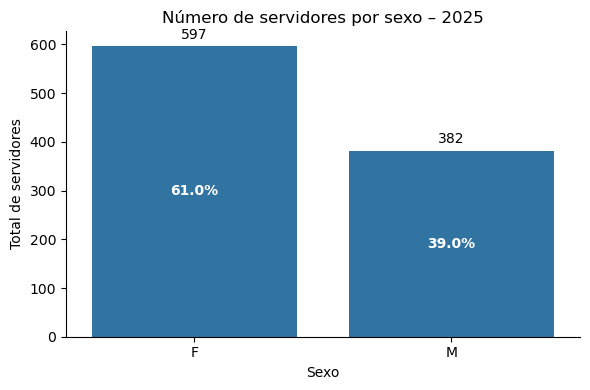

In [70]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=contagem_sexo,
    x="sexo",
    y="total_servidores"
)

# Número absoluto em cima da barra
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Percentual dentro da barra
for i, row in contagem_sexo.iterrows():
    ax.text(
        i,
        row["total_servidores"] / 2,
        f'{row["percentual"]}%',
        ha="center",
        va="center",
        color="white",
        fontweight="bold"
    )

plt.title("Número de servidores por sexo – 2025")
plt.xlabel("Sexo")
plt.ylabel("Total de servidores")

sns.despine()
plt.tight_layout()
plt.show()

- Concluímos então que 61% do quadro de servidores é do sexo Feminino e 39% do sexo Masculino.

### Desligamentos durante o ano de 2025 por sexo

In [76]:
df_deslig_2025 = df_serv[
    df_serv["data_desligamento"].notna() &
    (df_serv["data_desligamento"].dt.year == 2025)
]

In [77]:
deslig_por_sexo = (
    df_deslig_2025["sexo"]
    .value_counts()
    .loc[["F", "M"]]
    .reset_index()
)

deslig_por_sexo.columns = ["sexo", "total_desligamentos"]
deslig_por_sexo

,sexo,total_desligamentos
0,F,115
1,M,40


In [79]:
total = deslig_por_sexo["total_desligamentos"].sum()

deslig_por_sexo["percentual"] = (
    deslig_por_sexo["total_desligamentos"] / total * 100
).round(1)

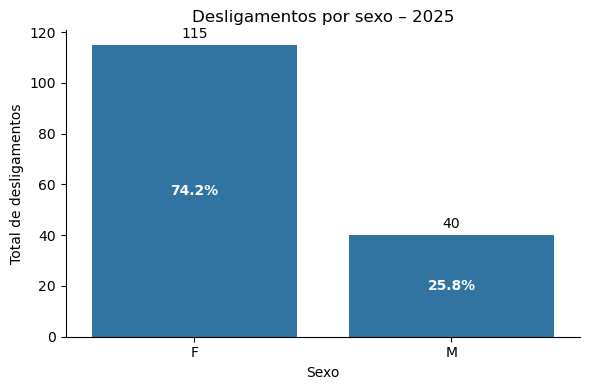

In [80]:

plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=deslig_por_sexo,
    x="sexo",
    y="total_desligamentos"
)

# Número absoluto em cima da barra
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Percentual dentro da barra
for i, row in deslig_por_sexo.iterrows():
    ax.text(
        i,
        row["total_desligamentos"] / 2,
        f'{row["percentual"]}%',
        ha="center",
        va="center",
        color="white",
        fontweight="bold"
    )

plt.title("Desligamentos por sexo – 2025")
plt.xlabel("Sexo")
plt.ylabel("Total de desligamentos")

sns.despine()
plt.tight_layout()
plt.show()

Em 2025, foram registrados 145 desligamentos, sendo 74.2% do sexo feminino e 25.8% do sexo masculino, indicando a distribuição dos desligamentos por sexo ao longo do ano.

In [81]:
df_unico = df_serv.drop_duplicates(subset="id_servidor")

total_serv_sexo = (
    df_unico.groupby("sexo")["id_servidor"].nunique()
    .loc[["F", "M"]]
    .reset_index(name="total_servidores")
)

In [82]:
taxa_deslig_sexo = total_serv_sexo.merge(
    deslig_por_sexo,
    on="sexo",
    how="left"
)

### Taxa de desligamento por sexo – 2025

A tabela apresenta a análise dos desligamentos de servidores no ano de 2025, segmentada por sexo, considerando **servidores únicos** e **eventos de desligamento**.

In [87]:
taxa_deslig_sexo["taxa_desligamento_pct"] = (
    taxa_deslig_sexo["total_desligamentos"] /
    taxa_deslig_sexo["total_servidores"] * 100
).round(2)


taxa_deslig_sexo

,sexo,total_servidores,total_desligamentos,percentual,taxa_desligamento_pct
0,F,597,115,74.20,19.26
1,M,382,40,25.80,10.47


**Definições utilizadas:**
- **Total de servidores**: quantidade de servidores distintos de cada sexo ao longo de 2025.
- **Total de desligamentos**: número de eventos de desligamento ocorridos em 2025.
- **Percentual**: participação de cada sexo no total de desligamentos.
- **Taxa de desligamento (%)**: razão entre o total de desligamentos e o total de servidores de cada sexo.

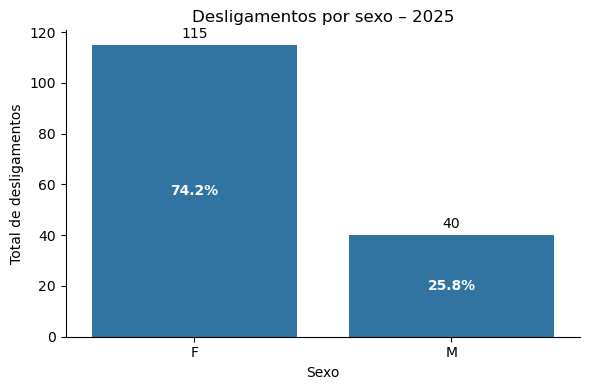

In [91]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=taxa_deslig_sexo,
    x="sexo",
    y="total_desligamentos"
)

# Número absoluto em cima da barra
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Percentual (taxa de desligamento) dentro da barra
for i, row in taxa_deslig_sexo.iterrows():
    ax.text(
        i,
        row["total_desligamentos"] / 2,
        f'{row["percentual"]:.1f}%',
        ha="center",
        va="center",
        color="white",
        fontweight="bold"
    )

plt.title("Desligamentos por sexo – 2025")
plt.xlabel("Sexo")
plt.ylabel("Total de desligamentos")

sns.despine()
plt.tight_layout()
plt.show()

#### Principais resultados

- O sexo feminino concentrou **74,2% dos desligamentos**, refletindo também sua maior presença no quadro total de servidores.
- A **taxa de desligamento entre servidoras (19,26%)** foi significativamente superior à observada entre servidores do sexo masculino (**10,47%**).
- Esse resultado indica uma **rotatividade proporcionalmente maior entre mulheres** no ano de 2025.

#### Observação metodológica
Cada servidor foi contado apenas uma vez no total de servidores, enquanto cada desligamento foi considerado como um evento individual, conforme a data efetiva de desligamento registrada nos dados.

> A análise da taxa de desligamento permite uma comparação mais justa entre os grupos, independentemente do tamanho do quadro funcional de cada sexo.


### Onde exatamente está acontecendo essa rotatividade?

### Desligamentos de servidoras por categoria de cargo – 2025

A tabela apresenta a distribuição dos desligamentos de servidoras no ano de 2025, segmentada por **categoria de cargo**, considerando cada desligamento como um evento individual.

In [92]:
mulheres_desligadas_2025 = df_serv[
    (df_serv["sexo"] == "F") &
    (df_serv["data_desligamento"].notna()) &
    (df_serv["data_desligamento"].dt.year == 2025)
]

In [93]:
deslig_cat = (
    mulheres_desligadas_2025["categoria_cargo"]
    .value_counts()
    .reset_index()
)

deslig_cat.columns = [
    "categoria_cargo",
    "total_desligamentos"
]

In [94]:
total = deslig_cat["total_desligamentos"].sum()

deslig_cat["percentual"] = (
    deslig_cat["total_desligamentos"] / total * 100
).round(2)

deslig_cat

,categoria_cargo,total_desligamentos,percentual
0,educacao,85,73.91
1,operacional,8,6.96
2,comissionado,8,6.96
3,assistencia_social,6,5.22
4,saude,6,5.22
5,administrativo,2,1.74


In [98]:
deslig_cat = deslig_cat.sort_values(
    by="total_desligamentos",
    ascending=False
)

deslig_cat

,categoria_cargo,total_desligamentos,percentual
0,educacao,85,73.91
1,operacional,8,6.96
2,comissionado,8,6.96
3,assistencia_social,6,5.22
4,saude,6,5.22
5,administrativo,2,1.74


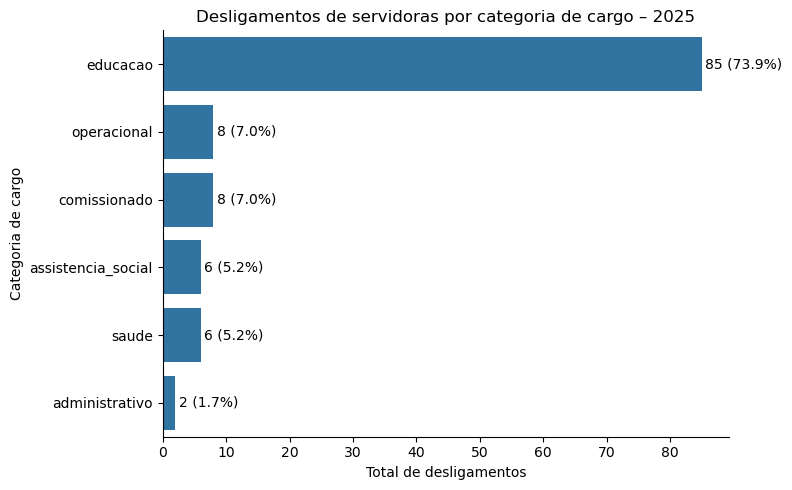

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=deslig_cat,
    y="categoria_cargo",
    x="total_desligamentos"
)

# Número absoluto + percentual no fim da barra
for i, row in deslig_cat.iterrows():
    ax.text(
        row["total_desligamentos"] + 0.5,
        i,
        f'{row["total_desligamentos"]} ({row["percentual"]:.1f}%)',
        va="center"
    )

plt.title("Desligamentos de servidoras por categoria de cargo – 2025")
plt.xlabel("Total de desligamentos")
plt.ylabel("Categoria de cargo")

sns.despine()
plt.tight_layout()
plt.show()


#### Principais resultados

- A categoria **Educação** concentra a ampla maioria dos desligamentos de servidoras, com **85 registros**, representando **73,91%** do total.
- As categorias **Operacional** e **Comissionado** aparecem em seguida, ambas com **8 desligamentos** cada (**6,96%**).
- As áreas de **Assistência Social** e **Saúde** registraram **6 desligamentos** cada, correspondendo a **5,22%** do total.
- A categoria **Administrativo** apresentou o menor volume, com **2 desligamentos** (**1,74%**).

#### Interpretação
Os resultados indicam que os desligamentos de servidoras em 2025 estiveram **fortemente concentrados na área da Educação**, sugerindo maior rotatividade ou maior volume de vínculos nessa categoria em comparação às demais. Esse padrão pode estar associado a características específicas dos cargos, como vínculos temporários, contratos por período letivo ou maior exposição a desligamentos ao longo do ano.

> **Nota metodológica:** a análise considera exclusivamente desligamentos ocorridos em 2025 e inclui apenas servidoras do sexo feminino, com base na data efetiva de desligamento registrada.
